# Assignment 7 - Clustering (East West Airlines)

### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('EastWestAirlines2.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data=data.drop(['ID#','Award?'],axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


### EDA

In [4]:
data.shape

(3999, 10)

In [5]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [7]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [8]:
data.describe(include='all')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [9]:
def norm_funct(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x) 

In [10]:
df_norm = norm_funct(data.iloc[:,1:])

### Clustering

In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

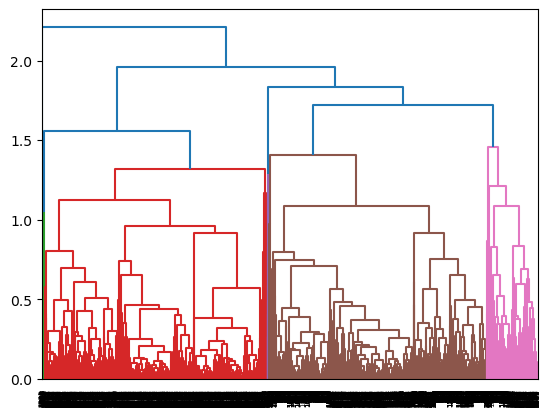

In [12]:
dendogram = sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [13]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
y_hc = hc.fit_predict(df_norm)

In [16]:
clusters = pd.DataFrame(y_hc,columns=['Clusters'])

In [17]:
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,2
3995,2
3996,2
3997,2


In [18]:
data['h_clusterid'] = clusters

In [19]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,2


### K-Means

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])

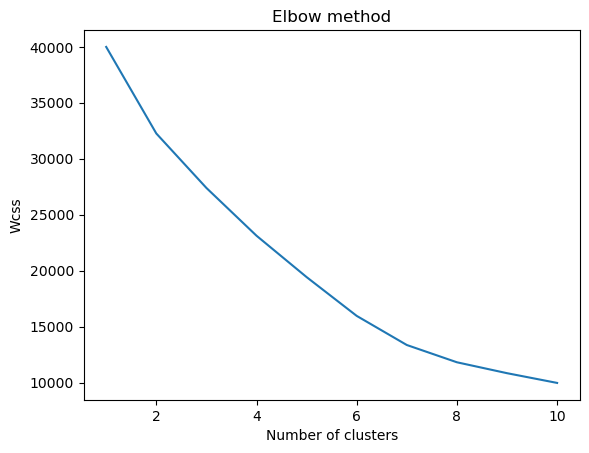

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.show()

In [23]:
new_clusters = KMeans(4, random_state=42)
new_clusters.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [24]:
new_clusters.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [25]:
data['clusterid_new'] = new_clusters.labels_

In [26]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,2,0


In [27]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,45389.963297,143.800241,1.536703,1.030084,1.00000,7672.810469,8.632972,225.460289,0.660650,2334.832732,2.000000
1,1,169061.711409,725.469799,2.181208,1.040268,1.00000,32041.161074,28.073826,5682.322148,16.590604,4664.583893,0.805369
2,2,131883.858191,142.182152,4.229829,1.001222,1.05868,52040.705379,20.188264,387.121027,1.204156,5013.788509,0.254279
3,3,62644.086861,82.421898,1.384672,1.000730,1.00073,6179.999270,8.285401,220.231387,0.684672,5688.558394,0.001460


In [28]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,2,0


### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,2,0


In [31]:
arr = data.values
arr

array([[28143,     0,     1, ...,  7000,     0,     3],
       [19244,     0,     1, ...,  6968,     0,     3],
       [41354,     0,     1, ...,  7034,     0,     3],
       ...,
       [73597,     0,     3, ...,  1402,     2,     0],
       [54899,     0,     1, ...,  1401,     2,     0],
       [ 3016,     0,     1, ...,  1398,     2,     0]], dtype=int64)

In [32]:
stscaler = StandardScaler().fit(arr)

In [33]:
x = stscaler.transform(arr)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -9.18073529e-01,  1.14831544e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -9.18073529e-01,  1.14831544e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -9.18073529e-01,  1.14831544e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.09143717e+00, -1.10936079e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00,  1.09143717e+00, -1.10936079e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00,  1.09143717e+00, -1.10936079e+00]])

In [34]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=6)

In [35]:
dbscan.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [36]:
cl = pd.DataFrame(dbscan.labels_,columns=['clusters'])
cl

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,1


In [37]:
pd.concat([data,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid,clusterid_new,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,2,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,2,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,2,0,1
